In [1]:
import pandas as pd

df = pd.read_csv('data/bert-multilingual-sentiments-base/oshie_score.csv')
df.head()

,Unnamed: 0,type,text,logit_value,pred_value,logit_score,pred_score,label_name
0,0,本文,この話が私の夢か私の一時的狂気の幻でなかったならば、あの押絵と旅をしていた男こそ狂人であった...,0.435936,0.437261,0.000000,0.000000,NEUTRAL
1,1,本文,だが、夢が時として、どこかこの世界と喰違った別の世界を、チラリと覗かせてくれる様に、又狂人が...,0.964032,0.523160,0.000000,0.000000,NEUTRAL
2,2,本文,いつとも知れぬ、ある暖かい薄曇った日のことである。,0.538906,0.501536,0.000000,0.000000,NEUTRAL
3,3,本文,その時、私は態々魚津へ蜃気楼を見に出掛けた帰り途であった。,0.681818,0.541357,0.000000,0.000000,NEUTRAL
4,4,本文,私がこの話をすると、時々、お前は魚津なんかへ行ったことはないじゃないかと、親しい友達に突っ込...,1.094633,0.582807,1.101838,0.582807,POSITIVE


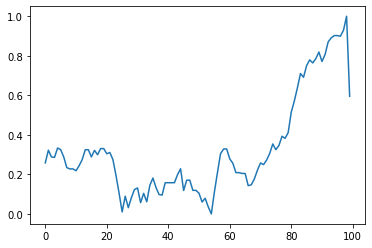

In [2]:
from library import score
import matplotlib.pyplot as plt
# 曲線表示
window_size = int(df.shape[0] / 5)
logit_score_mean = score.get_score_mean(df['logit_score'], window_size=window_size)
logit_score_norm = score.score_normalize(logit_score_mean)
plt.plot(logit_score_norm)

In [3]:
def coef(label):
    if label.upper() == 'POSITIVE':
        return 1
    elif label.upper() == 'NEGATIVE':
        return -1
    else:
        return 0

In [4]:
diff = abs(df[df['logit_value']<0]['logit_value'].min())
df_diff = df.copy()
if diff > 0:
    print(f'diff:{diff}')
    # df_diff['logit_score'] = df_diff['logit_score'] +  df['label_name'].apply(lambda d: diff if d != 'NEUTRAL' else 0)
    logit_values = df_diff['logit_value'] +  diff
    df_diff['logit_score'] = logit_values * df['label_name'].apply(coef)
df_diff.head(10)

diff:0.0072055021300911


,Unnamed: 0,type,text,logit_value,pred_value,logit_score,pred_score,label_name
0,0,本文,この話が私の夢か私の一時的狂気の幻でなかったならば、あの押絵と旅をしていた男こそ狂人であった...,0.435936,0.437261,0.000000,0.000000,NEUTRAL
1,1,本文,だが、夢が時として、どこかこの世界と喰違った別の世界を、チラリと覗かせてくれる様に、又狂人が...,0.964032,0.523160,0.000000,0.000000,NEUTRAL
2,2,本文,いつとも知れぬ、ある暖かい薄曇った日のことである。,0.538906,0.501536,0.000000,0.000000,NEUTRAL
3,3,本文,その時、私は態々魚津へ蜃気楼を見に出掛けた帰り途であった。,0.681818,0.541357,0.000000,0.000000,NEUTRAL
4,4,本文,私がこの話をすると、時々、お前は魚津なんかへ行ったことはないじゃないかと、親しい友達に突っ込...,1.094633,0.582807,1.101838,0.582807,POSITIVE
5,5,本文,そう云われて見ると、私は何時の何日に魚津へ行ったのだと、ハッキリ証拠を示すことが出来ぬ。,1.028086,0.567208,-1.035291,-0.567208,NEGATIVE
6,6,本文,それではやっぱり夢であったのか。,1.314990,0.760741,0.000000,0.000000,NEUTRAL
7,7,本文,だが私は嘗て、あのように濃厚な色彩を持った夢を見たことがない。,1.071915,0.658111,0.000000,0.000000,NEUTRAL
8,8,本文,夢の中の景色は、映画と同じに、全く色彩を伴わぬものであるのに、あの折の汽車の中の景色丈けは、...,1.743872,0.854272,1.751077,0.854272,POSITIVE
9,9,本文,着色映画の夢というものがあるのであろうか。,1.078759,0.636153,0.000000,0.000000,NEUTRAL


In [5]:
df_posi_nega = df_diff[df_diff['label_name']!='NEUTRAL']
abs(df_posi_nega['logit_score'])-abs(df_posi_nega['logit_value'])

4      0.007206
5      0.007206
8      0.007206
10     0.007206
11     0.007206
         ...   
310    0.007206
311    0.007206
313    0.007206
318    0.007206
321    0.007206
Length: 145, dtype: float64

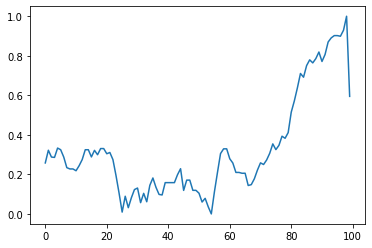

In [6]:
# 曲線表示
window_size = int(df_diff.shape[0] / 5)
diff_logit_score_mean = score.get_score_mean(df_diff['logit_score'], window_size=window_size)
diff_logit_score_norm = score.score_normalize(diff_logit_score_mean)
plt.plot(diff_logit_score_norm)

In [7]:
df_ginga = pd.read_csv('data/bert-multilingual-sentiments-base/ginga_score.csv')
df_ginga.head()

,Unnamed: 0,type,text,logit_value,pred_value,logit_score,pred_score,label_name
0,0,本文,一、午后の授業,0.723805,0.573173,0.000000,0.000000,NEUTRAL
1,1,本文,「ではみなさんは、そういうふうに川だと云われたり、乳の流れたあとだと云われたりしていたこのぼ...,0.983355,0.643631,0.000000,0.000000,NEUTRAL
2,2,本文,」先生は、黒板に吊した大きな黒い星座の図の、上から下へ白くけぶった銀河帯のようなところを指し...,0.698622,0.507899,0.698622,0.507899,POSITIVE
3,3,本文,カムパネルラが手をあげました。,0.506047,0.492473,0.000000,0.000000,NEUTRAL
4,4,本文,それから四五人手をあげました。,0.414241,0.439764,0.000000,0.000000,NEUTRAL


In [8]:
diff = abs(df_ginga[df_ginga['logit_value']<0]['logit_value'].min())
if (diff > 0):
    print('ok')